# Exploratory Data Analysis (EDA)
## Diabetes Risk & Insulin Management System

This notebook performs comprehensive exploratory data analysis on the diabetes monitoring dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add parent directory to path
sys.path.insert(0, str(Path().resolve().parent))

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Data


In [2]:
# Load raw data
data_path = Path('../data/raw_data/SmartSensor_DiabetesMonitoring.csv')
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (4981, 17)

Columns: ['Patient_ID', 'Timestamp', 'Glucose_Level', 'Heart_Rate', 'Activity_Level', 'Calories_Burned', 'Sleep_Duration', 'Step_Count', 'Insulin_Dose', 'Medication_Intake', 'Diet_Quality_Score', 'Stress_Level', 'BMI', 'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Predicted_Progression']

First few rows:


,Patient_ID,Timestamp,Glucose_Level,Heart_Rate,Activity_Level,Calories_Burned,Sleep_Duration,Step_Count,Insulin_Dose,Medication_Intake,Diet_Quality_Score,Stress_Level,BMI,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Predicted_Progression
0,P052,2025-06-01 00:00:00,165.7,67.0,68,193.1,4.4,8832,8,1,8,4,26.2,5.5,109,68,1
1,P093,2025-06-01 00:15:00,114.0,70.0,38,205.9,4.3,2255,0,0,5,9,24.5,6.2,152,79,1
2,P015,2025-06-01 00:30:00,125.2,81.0,69,274.5,6.1,1299,4,1,8,9,26.0,5.5,143,99,2
3,P072,2025-06-01 00:45:00,157.1,82.0,99,141.9,4.2,8809,10,1,4,9,22.1,6.8,112,60,0
4,P061,2025-06-01 01:00:00,156.8,62.0,3,245.7,7.7,5521,10,0,10,3,21.4,7.7,152,72,1


## 2. Basic Information


In [3]:
# Basic info
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

print("\n" + "=" * 60)
print("DUPLICATE ROWS")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")


DATASET INFORMATION

Shape: 4981 rows × 17 columns

Memory usage: 1.14 MB

DATA TYPES
Patient_ID                   object
Timestamp                    object
Glucose_Level               float64
Heart_Rate                  float64
Activity_Level                int64
Calories_Burned             float64
Sleep_Duration              float64
Step_Count                    int64
Insulin_Dose                  int64
Medication_Intake             int64
Diet_Quality_Score            int64
Stress_Level                  int64
BMI                         float64
HbA1c                       float64
Blood_Pressure_Systolic       int64
Blood_Pressure_Diastolic      int64
Predicted_Progression         int64
dtype: object

MISSING VALUES
No missing values found!

DUPLICATE ROWS
Duplicate rows: 0 (0.00%)


## 3. Statistical Summary


In [4]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe()


STATISTICAL SUMMARY


,Glucose_Level,Heart_Rate,Activity_Level,Calories_Burned,Sleep_Duration,Step_Count,Insulin_Dose,Medication_Intake,Diet_Quality_Score,Stress_Level,BMI,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Predicted_Progression
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,140.267717,74.809074,50.497892,200.933467,6.457719,5514.581811,5.039550,0.486248,5.517968,5.509335,26.018049,6.503112,129.452921,79.730978,0.856254
std,29.847475,10.084636,29.337529,50.051439,1.427316,2603.645823,3.411686,0.499861,2.862920,2.853055,4.042849,0.987502,17.317344,11.495534,0.788863
min,28.700000,34.000000,0.000000,23.000000,4.000000,1000.000000,0.000000,0.000000,1.000000,1.000000,12.600000,3.100000,100.000000,60.000000,0.000000
25%,120.200000,68.000000,25.000000,166.700000,5.200000,3238.000000,2.000000,0.000000,3.000000,3.000000,23.300000,5.800000,114.000000,70.000000,0.000000
50%,140.500000,75.000000,50.000000,200.700000,6.400000,5502.000000,6.000000,0.000000,6.000000,6.000000,26.000000,6.500000,130.000000,80.000000,1.000000
75%,160.500000,82.000000,76.000000,234.700000,7.700000,7797.000000,8.000000,1.000000,8.000000,8.000000,28.800000,7.200000,144.000000,90.000000,1.000000
max,249.700000,107.000000,100.000000,388.900000,9.000000,9998.000000,10.000000,1.000000,10.000000,10.000000,40.200000,9.900000,159.000000,99.000000,2.000000


## 4. Target Variable Analysis


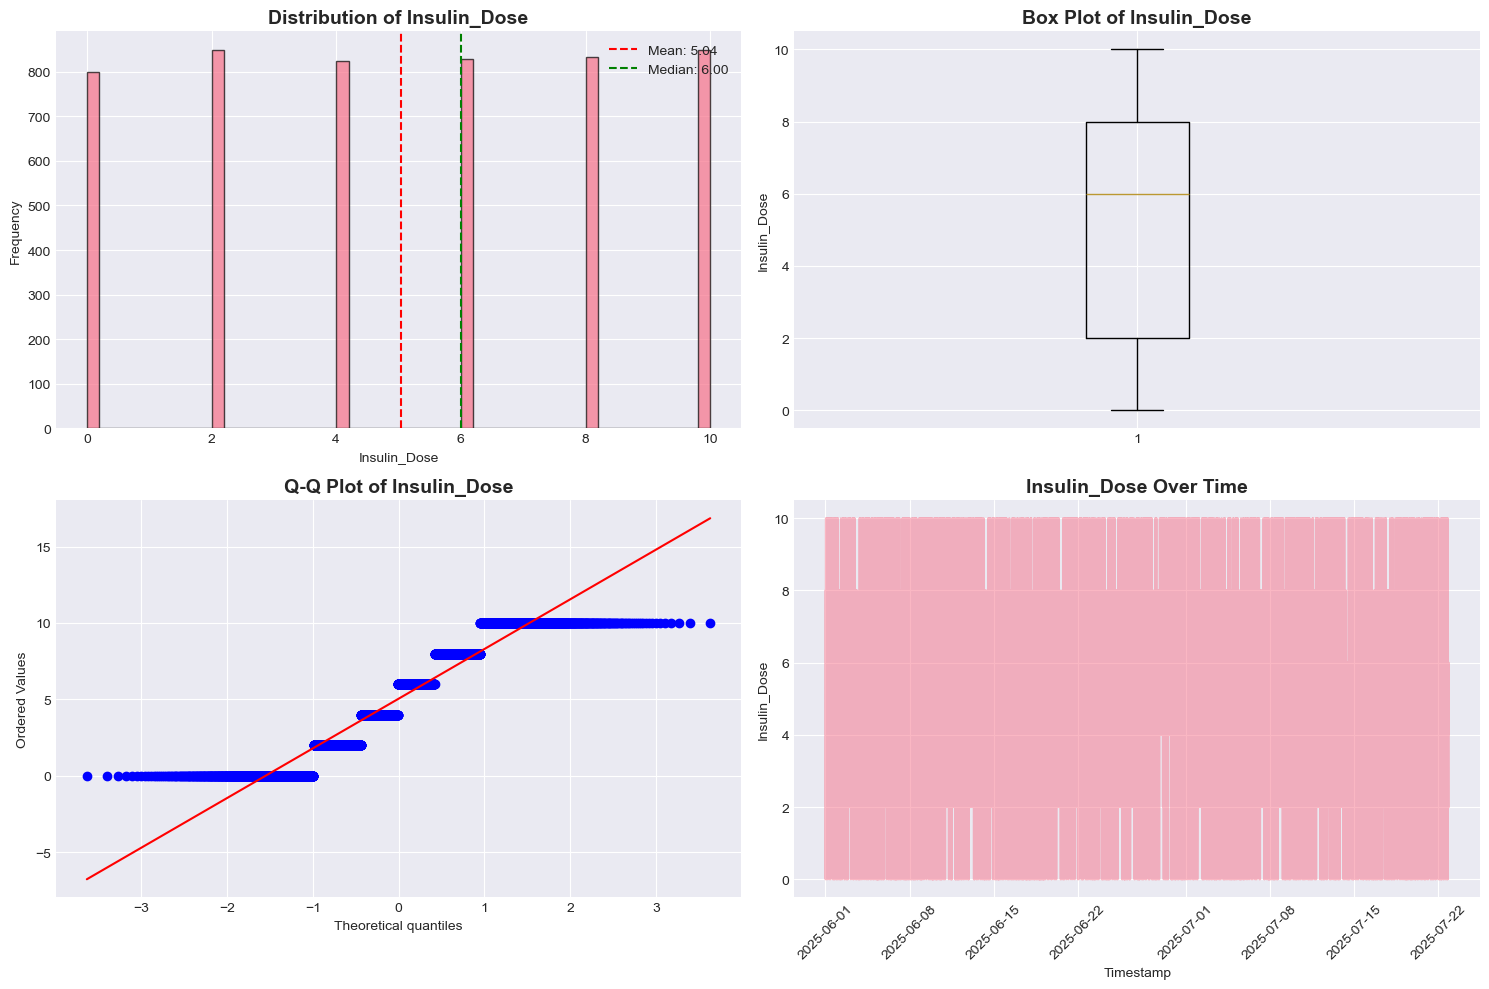


Insulin_Dose Statistics:
  Mean: 5.04
  Median: 6.00
  Std: 3.41
  Min: 0.00
  Max: 10.00
  Skewness: -0.01
  Kurtosis: -1.27


In [5]:
# Target variable analysis
target = 'Insulin_Dose'

if target in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribution
    axes[0, 0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title(f'Distribution of {target}', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel(target)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df[target].mean(), color='r', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
    axes[0, 0].axvline(df[target].median(), color='g', linestyle='--', label=f'Median: {df[target].median():.2f}')
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(df[target], vert=True)
    axes[0, 1].set_title(f'Box Plot of {target}', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel(target)
    
    # Q-Q plot
    from scipy import stats
    stats.probplot(df[target], dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title(f'Q-Q Plot of {target}', fontsize=14, fontweight='bold')
    
    # Time series (if timestamp available)
    if 'Timestamp' in df.columns:
        df_temp = df.copy()
        df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])
        df_temp = df_temp.sort_values('Timestamp')
        axes[1, 1].plot(df_temp['Timestamp'], df_temp[target], alpha=0.5)
        axes[1, 1].set_title(f'{target} Over Time', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Timestamp')
        axes[1, 1].set_ylabel(target)
        axes[1, 1].tick_params(axis='x', rotation=45)
    else:
        axes[1, 1].text(0.5, 0.5, 'No Timestamp column', ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title(f'{target} Over Time', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print(f"\n{target} Statistics:")
    print(f"  Mean: {df[target].mean():.2f}")
    print(f"  Median: {df[target].median():.2f}")
    print(f"  Std: {df[target].std():.2f}")
    print(f"  Min: {df[target].min():.2f}")
    print(f"  Max: {df[target].max():.2f}")
    print(f"  Skewness: {df[target].skew():.2f}")
    print(f"  Kurtosis: {df[target].kurtosis():.2f}")
else:
    print(f"Target variable '{target}' not found in dataset")


## 5. Feature Distributions


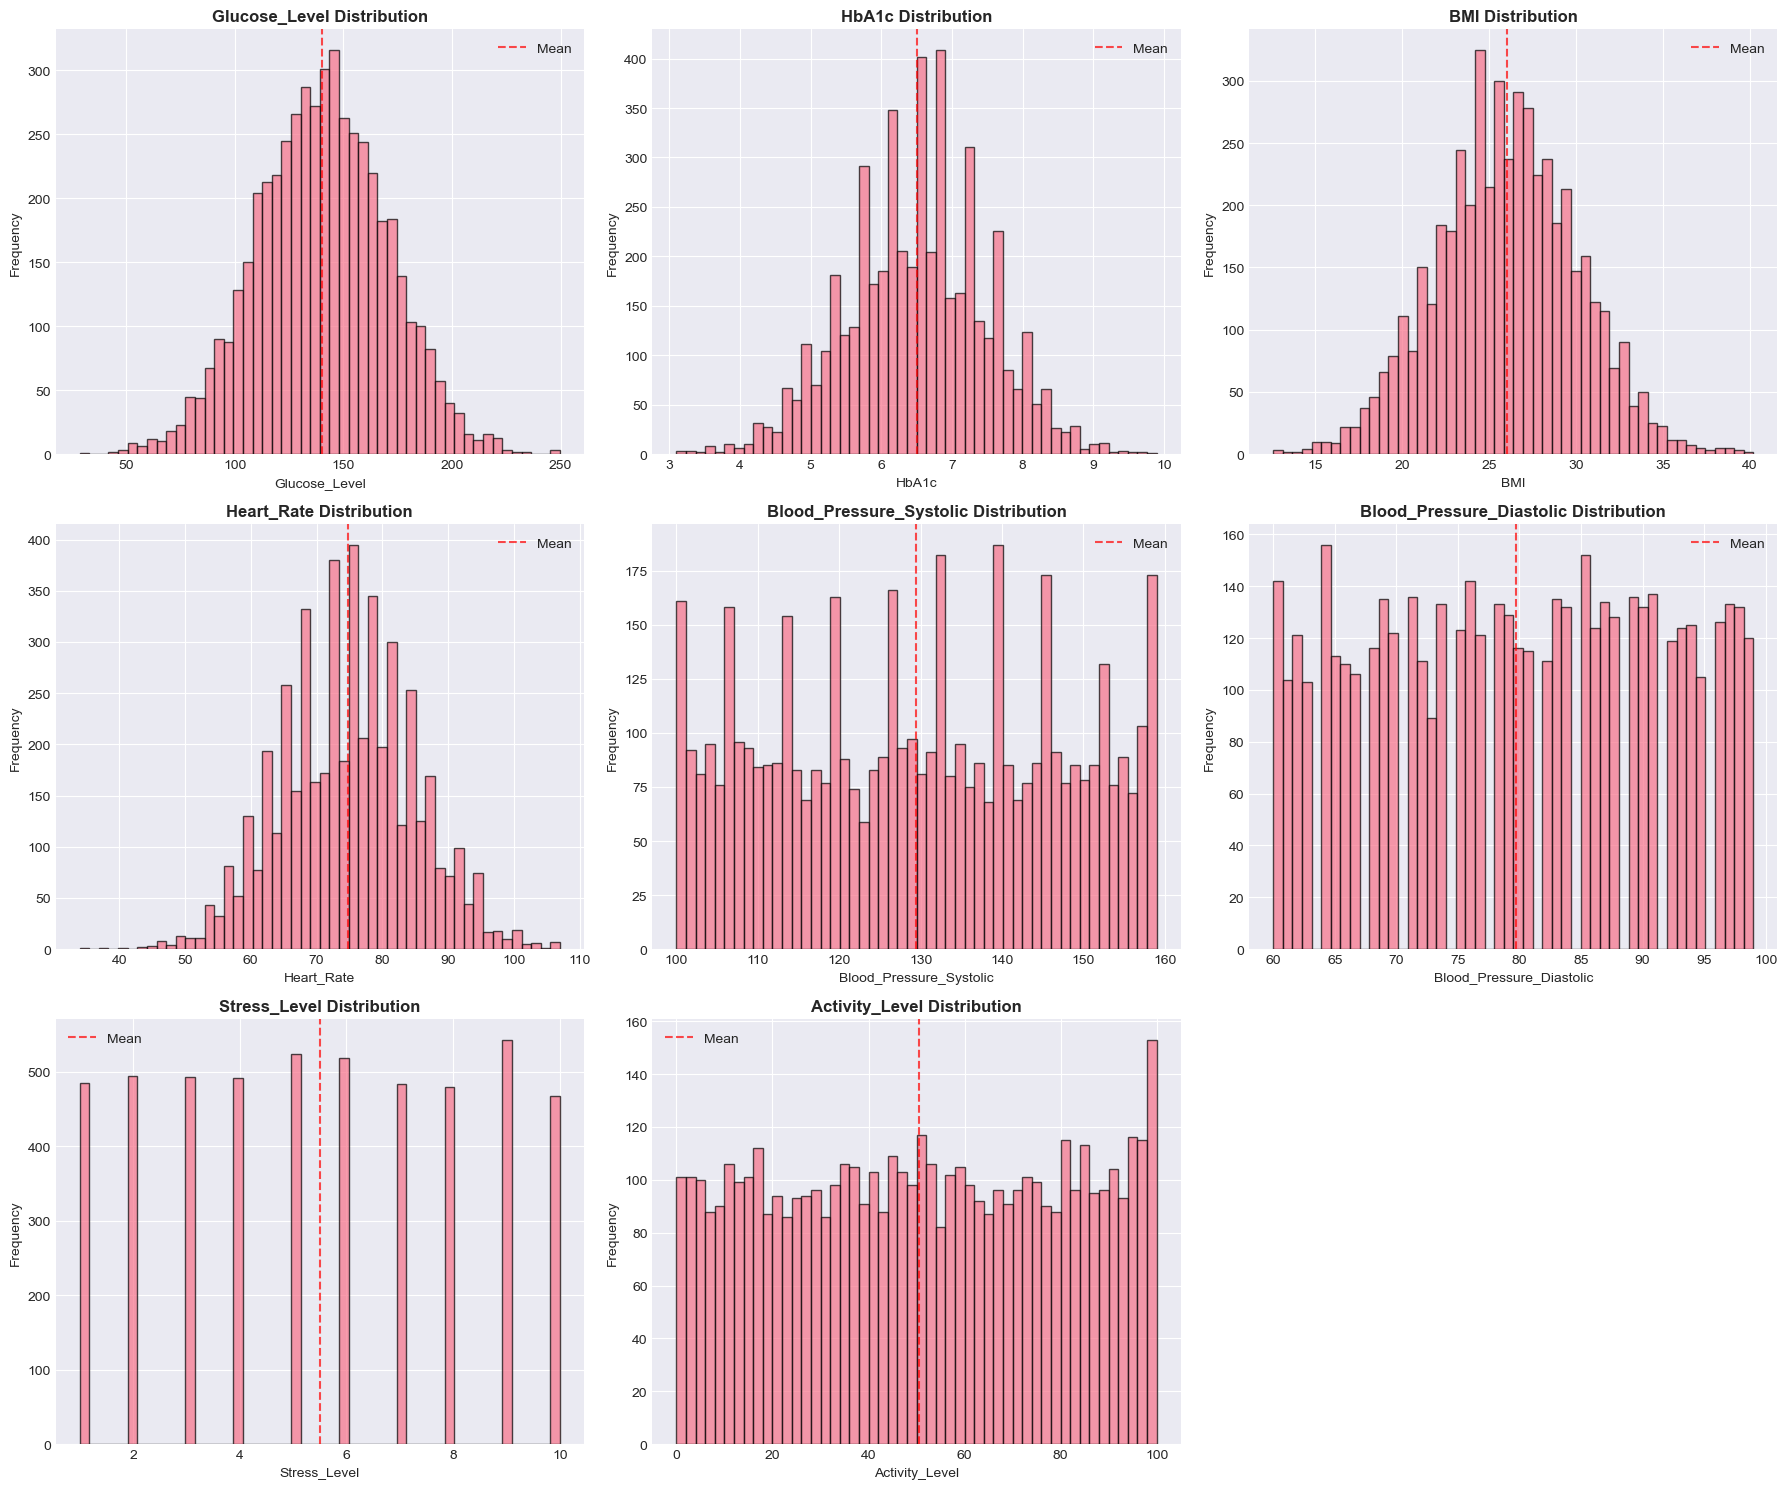

In [6]:
# Key features distribution
key_features = ['Glucose_Level', 'HbA1c', 'BMI', 'Heart_Rate', 
                'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                'Stress_Level', 'Activity_Level']

# Filter to existing columns
key_features = [f for f in key_features if f in df.columns]

if len(key_features) > 0:
    n_cols = 3
    n_rows = (len(key_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, feature in enumerate(key_features):
        if idx < len(axes):
            axes[idx].hist(df[feature].dropna(), bins=50, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(feature)
            axes[idx].set_ylabel('Frequency')
            axes[idx].axvline(df[feature].mean(), color='r', linestyle='--', alpha=0.7, label='Mean')
            axes[idx].legend()
    
    # Hide extra subplots
    for idx in range(len(key_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No key features found in dataset")


## 6. Correlation Analysis


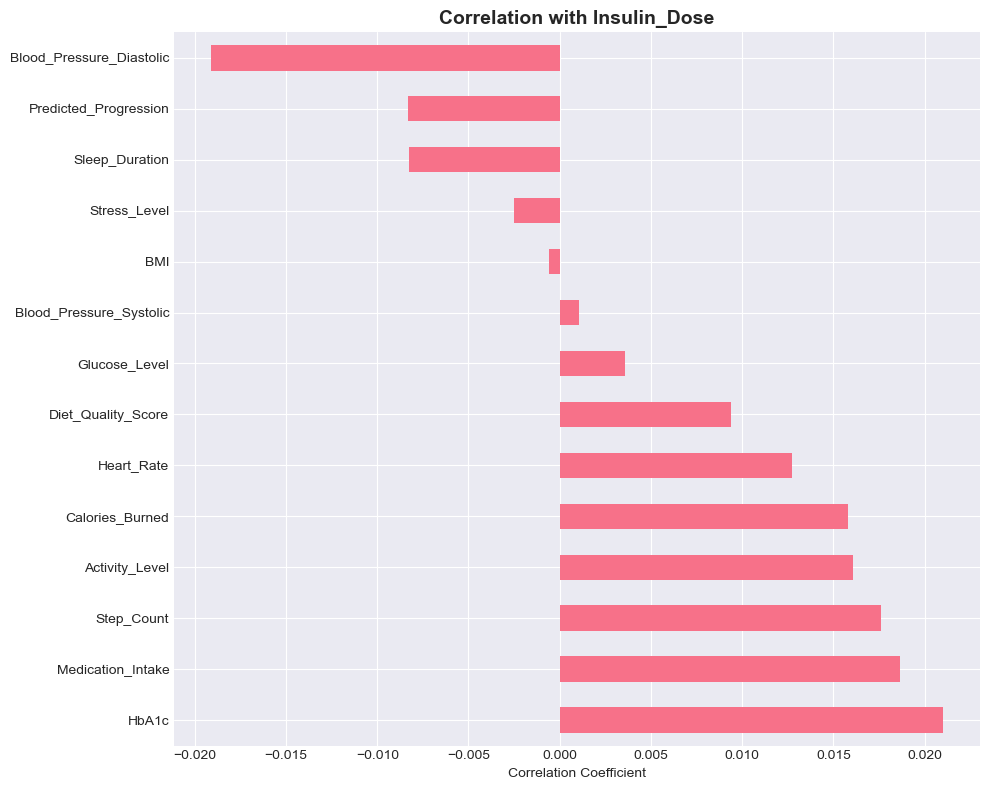


Top 10 Features Correlated with Target:
HbA1c                      0.021033
Medication_Intake          0.018629
Step_Count                 0.017632
Activity_Level             0.016078
Calories_Burned            0.015790
Heart_Rate                 0.012762
Diet_Quality_Score         0.009415
Glucose_Level              0.003563
Blood_Pressure_Systolic    0.001083
BMI                       -0.000609
Name: Insulin_Dose, dtype: float64


In [7]:
# Correlation with target
target = 'Insulin_Dose'
if target in df.columns:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target in numeric_cols:
        numeric_cols.remove(target)
    
    correlations = df[numeric_cols + [target]].corr()[target].sort_values(ascending=False)
    correlations = correlations.drop(target)
    
    plt.figure(figsize=(10, max(8, len(correlations) * 0.5)))
    correlations.plot(kind='barh')
    plt.title(f'Correlation with {target}', fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Features Correlated with Target:")
    print(correlations.head(10))


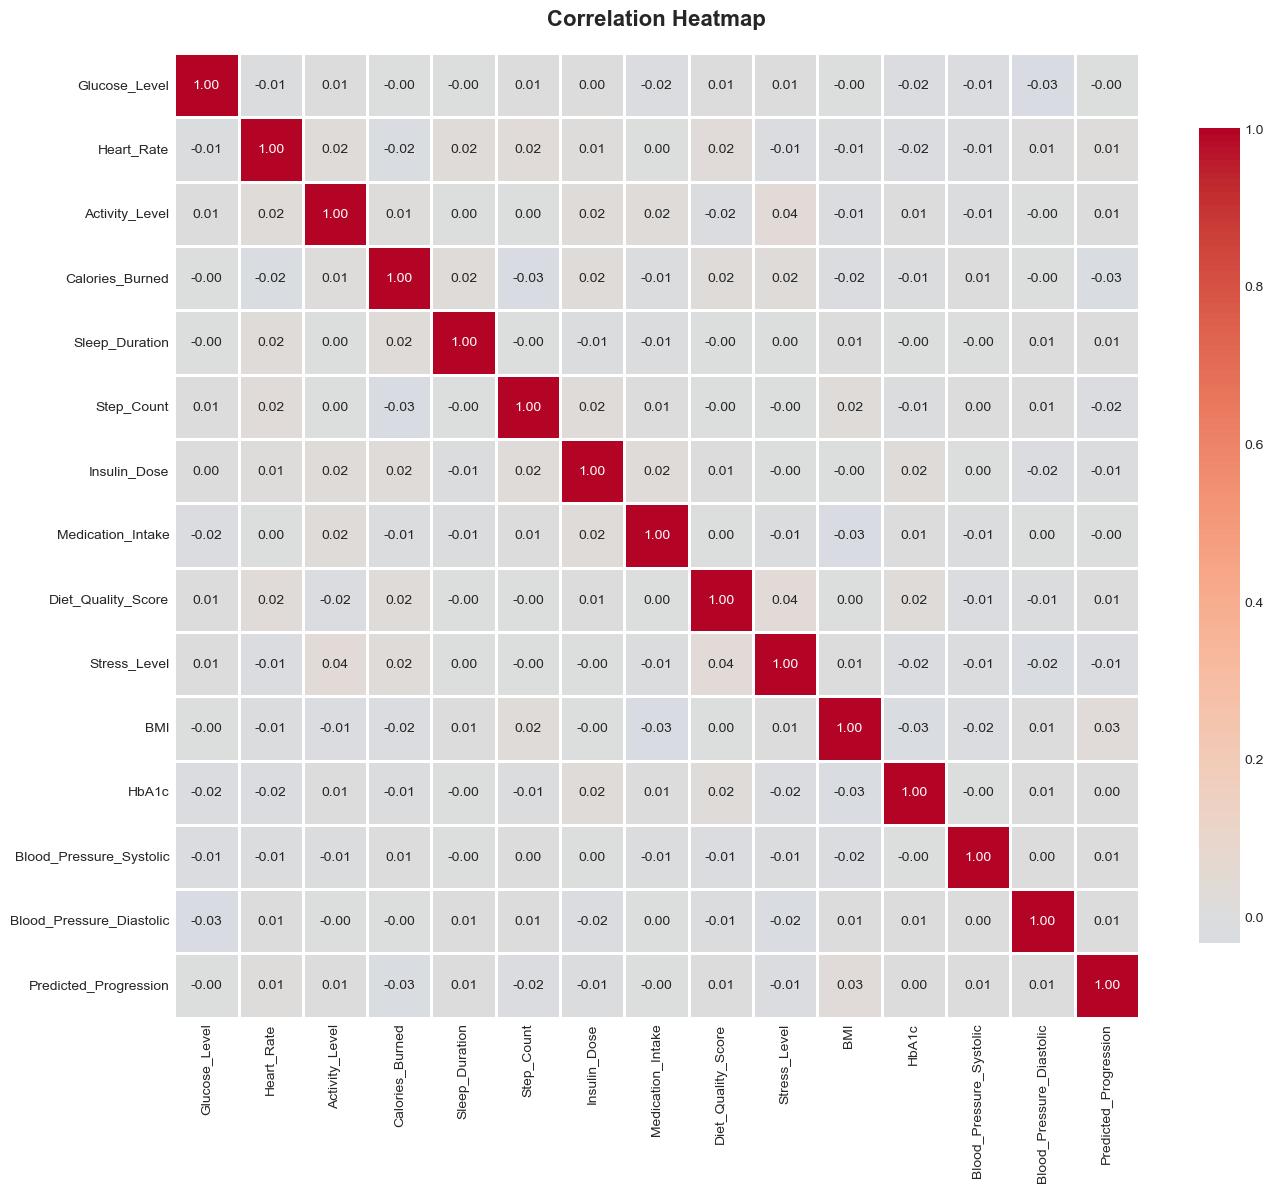

In [8]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 1:
    # Limit to top 15 features for readability
    if len(numeric_cols) > 15:
        if target in numeric_cols:
            top_features = correlations.abs().head(14).index.tolist() + [target]
        else:
            top_features = correlations.abs().head(15).index.tolist()
        corr_matrix = df[top_features].corr()
    else:
        corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


## 7. Outlier Detection


Outlier Summary (IQR Method):
                 Feature  Outliers Percentage Lower Bound Upper Bound
           Glucose_Level        37      0.74%       59.75      220.95
                   HbA1c        24      0.48%        3.70        9.30
                     BMI        38      0.76%       15.05       37.05
              Heart_Rate        21      0.42%       47.00      103.00
 Blood_Pressure_Systolic         0      0.00%       69.00      189.00
Blood_Pressure_Diastolic         0      0.00%       40.00      120.00
            Insulin_Dose         0      0.00%       -7.00       17.00


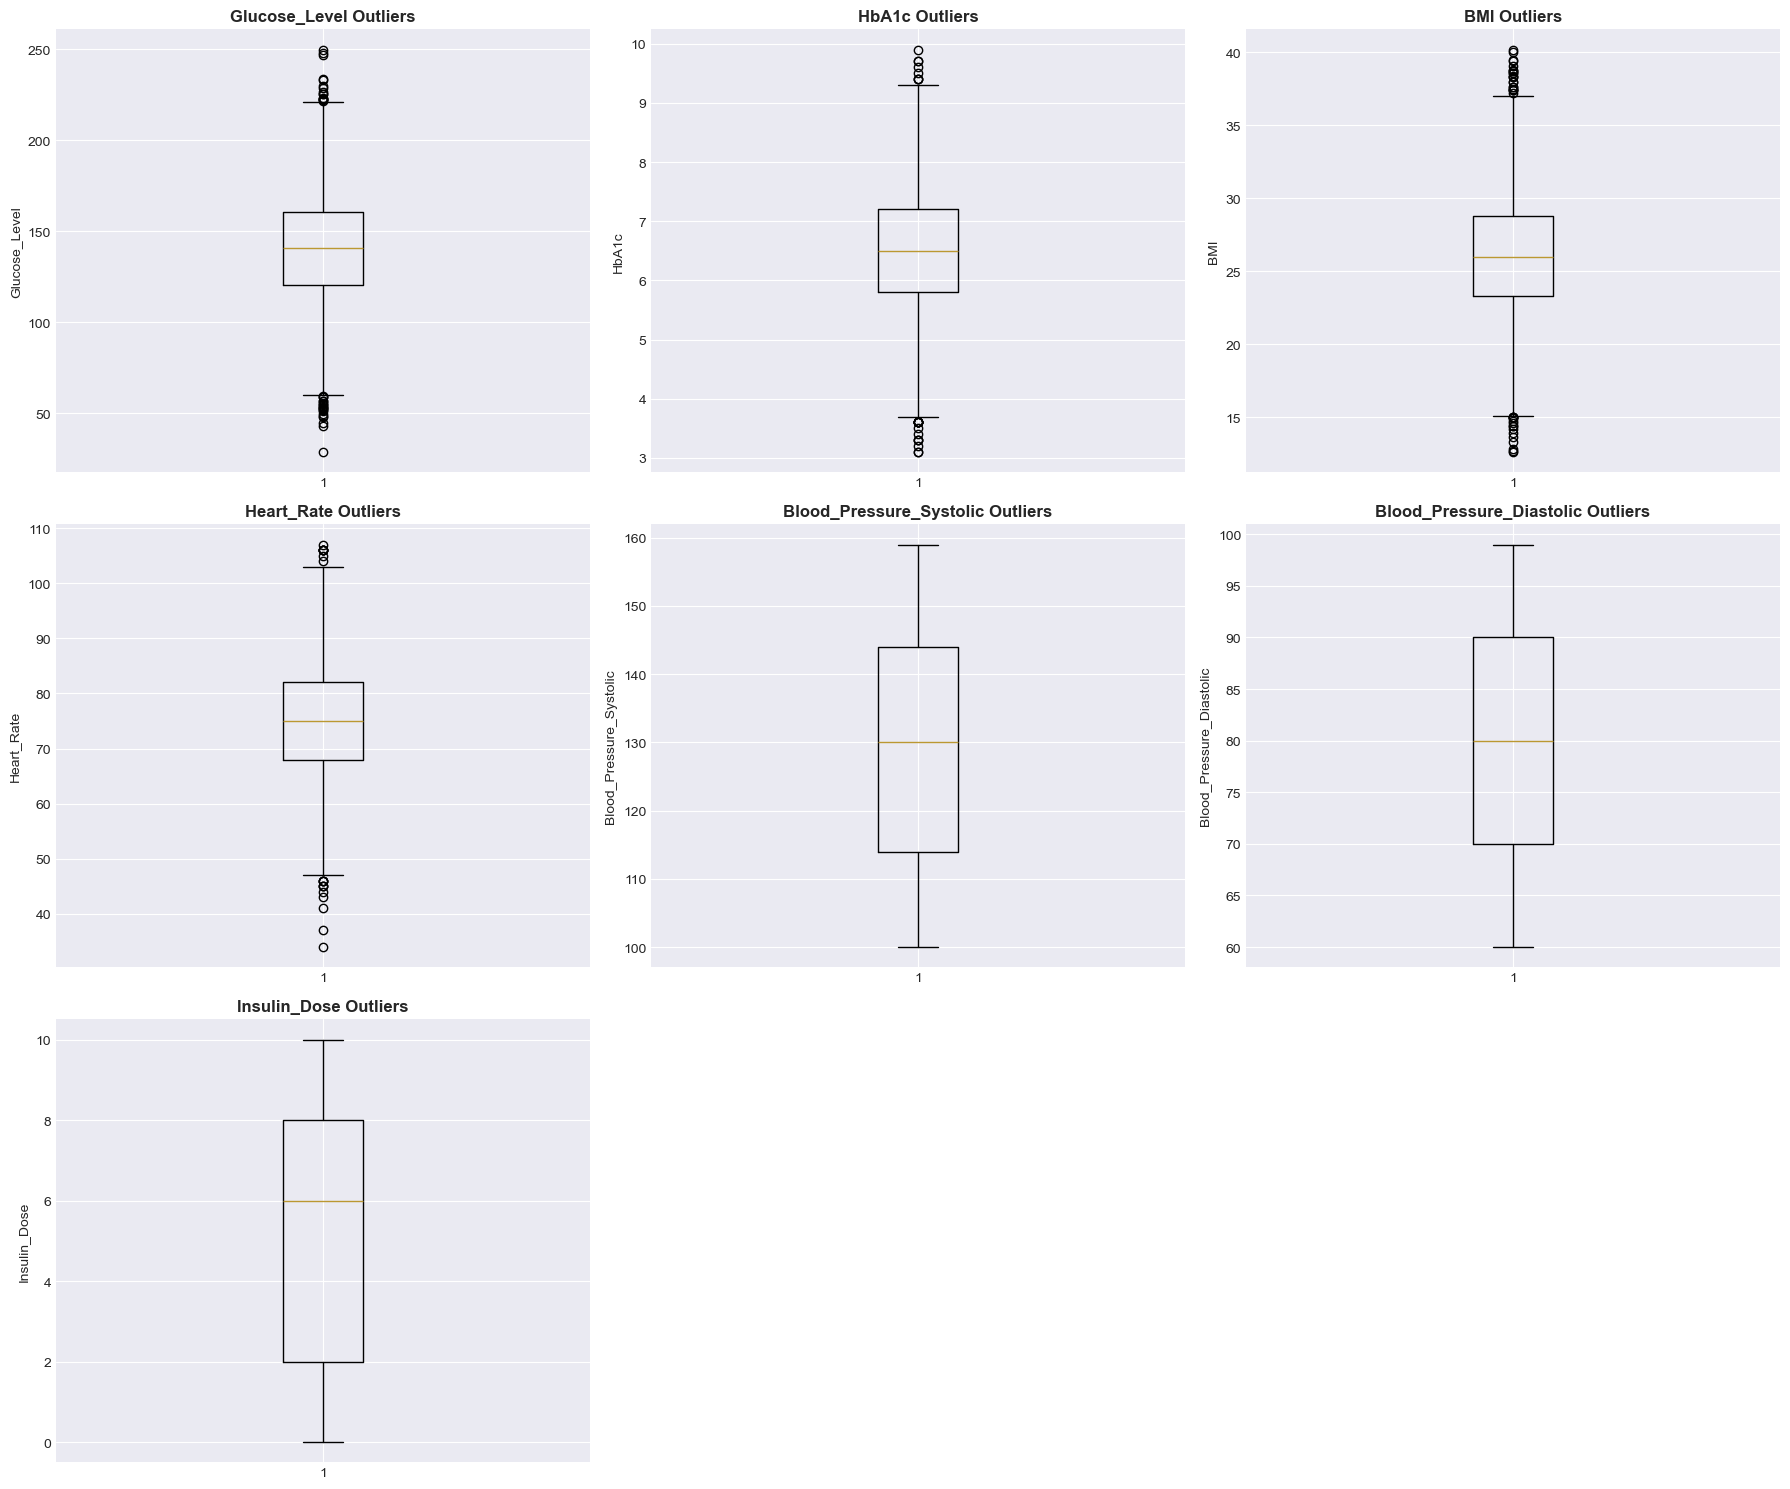

In [9]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in key features
outlier_summary = []
key_features = ['Glucose_Level', 'HbA1c', 'BMI', 'Heart_Rate', 
                'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Insulin_Dose']
key_features = [f for f in key_features if f in df.columns]

for feature in key_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    outlier_summary.append({
        'Feature': feature,
        'Outliers': outlier_count,
        'Percentage': f'{outlier_pct:.2f}%',
        'Lower Bound': f'{lower:.2f}',
        'Upper Bound': f'{upper:.2f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Summary (IQR Method):")
print(outlier_df.to_string(index=False))

# Visualize outliers
if len(key_features) > 0:
    n_cols = 3
    n_rows = (len(key_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, feature in enumerate(key_features):
        if idx < len(axes):
            axes[idx].boxplot(df[feature].dropna())
            axes[idx].set_title(f'{feature} Outliers', fontsize=12, fontweight='bold')
            axes[idx].set_ylabel(feature)
    
    for idx in range(len(key_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


## 8. Patient-Level Analysis


Patient-Level Statistics:
           Insulin_Dose                     Glucose_Level        HbA1c
                  count  mean   std min max          mean    std  mean
Patient_ID                                                            
P001                 53  5.51  3.35   0  10        137.16  29.41  6.56
P002                 52  5.27  3.43   0  10        139.45  28.68  6.41
P003                 54  5.04  3.38   0  10        146.11  25.71  6.64
P004                 51  5.33  3.39   0  10        134.88  28.45  6.54
P005                 50  4.80  3.55   0  10        138.62  29.14  6.64
P006                 48  4.46  3.46   0  10        134.85  33.41  6.45
P007                 43  4.74  3.75   0  10        144.19  28.33  6.62
P008                 63  5.08  3.44   0  10        141.19  28.38  6.59
P009                 47  3.70  3.26   0  10        145.52  25.26  6.60
P010                 47  5.02  3.44   0  10        137.82  31.05  6.60


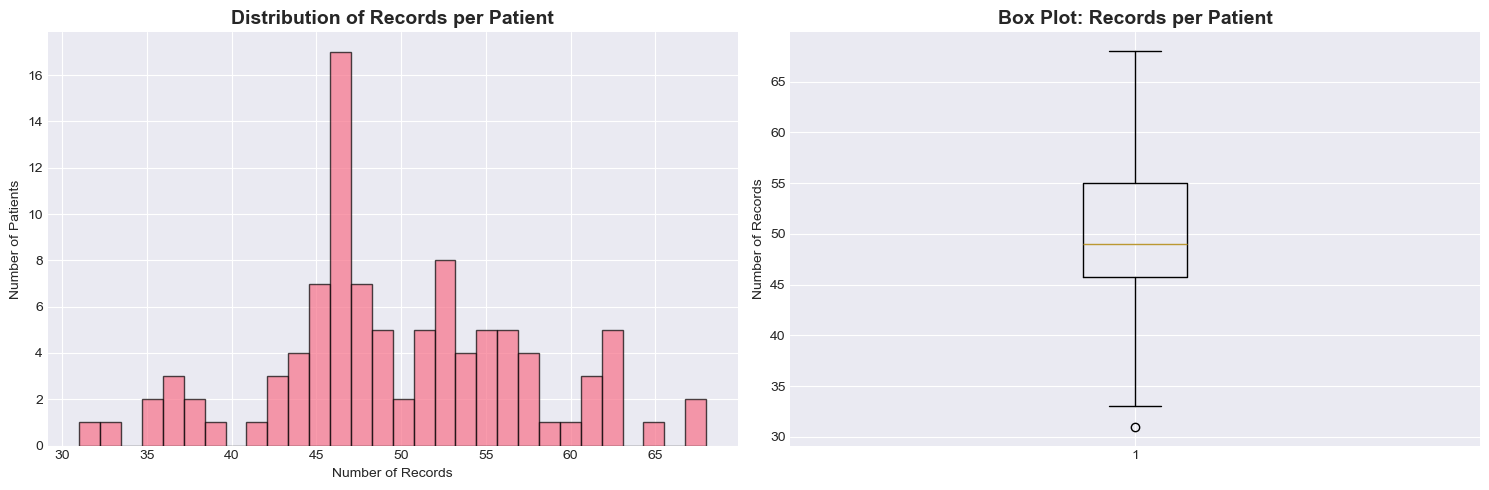


Total Patients: 100
Average records per patient: 49.81
Min records: 31
Max records: 68


In [10]:
# Patient-level statistics
if 'Patient_ID' in df.columns:
    patient_stats = df.groupby('Patient_ID').agg({
        'Insulin_Dose': ['count', 'mean', 'std', 'min', 'max'] if 'Insulin_Dose' in df.columns else 'count',
        'Glucose_Level': ['mean', 'std'] if 'Glucose_Level' in df.columns else 'count',
        'HbA1c': 'mean' if 'HbA1c' in df.columns else 'count'
    }).round(2)
    
    print("Patient-Level Statistics:")
    print(patient_stats.head(10))
    
    # Number of records per patient
    records_per_patient = df['Patient_ID'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].hist(records_per_patient, bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Records per Patient', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Number of Records')
    axes[0].set_ylabel('Number of Patients')
    
    axes[1].boxplot(records_per_patient)
    axes[1].set_title('Box Plot: Records per Patient', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Number of Records')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal Patients: {df['Patient_ID'].nunique()}")
    print(f"Average records per patient: {records_per_patient.mean():.2f}")
    print(f"Min records: {records_per_patient.min()}")
    print(f"Max records: {records_per_patient.max()}")
else:
    print("Patient_ID column not found")


## 9. Temporal Analysis


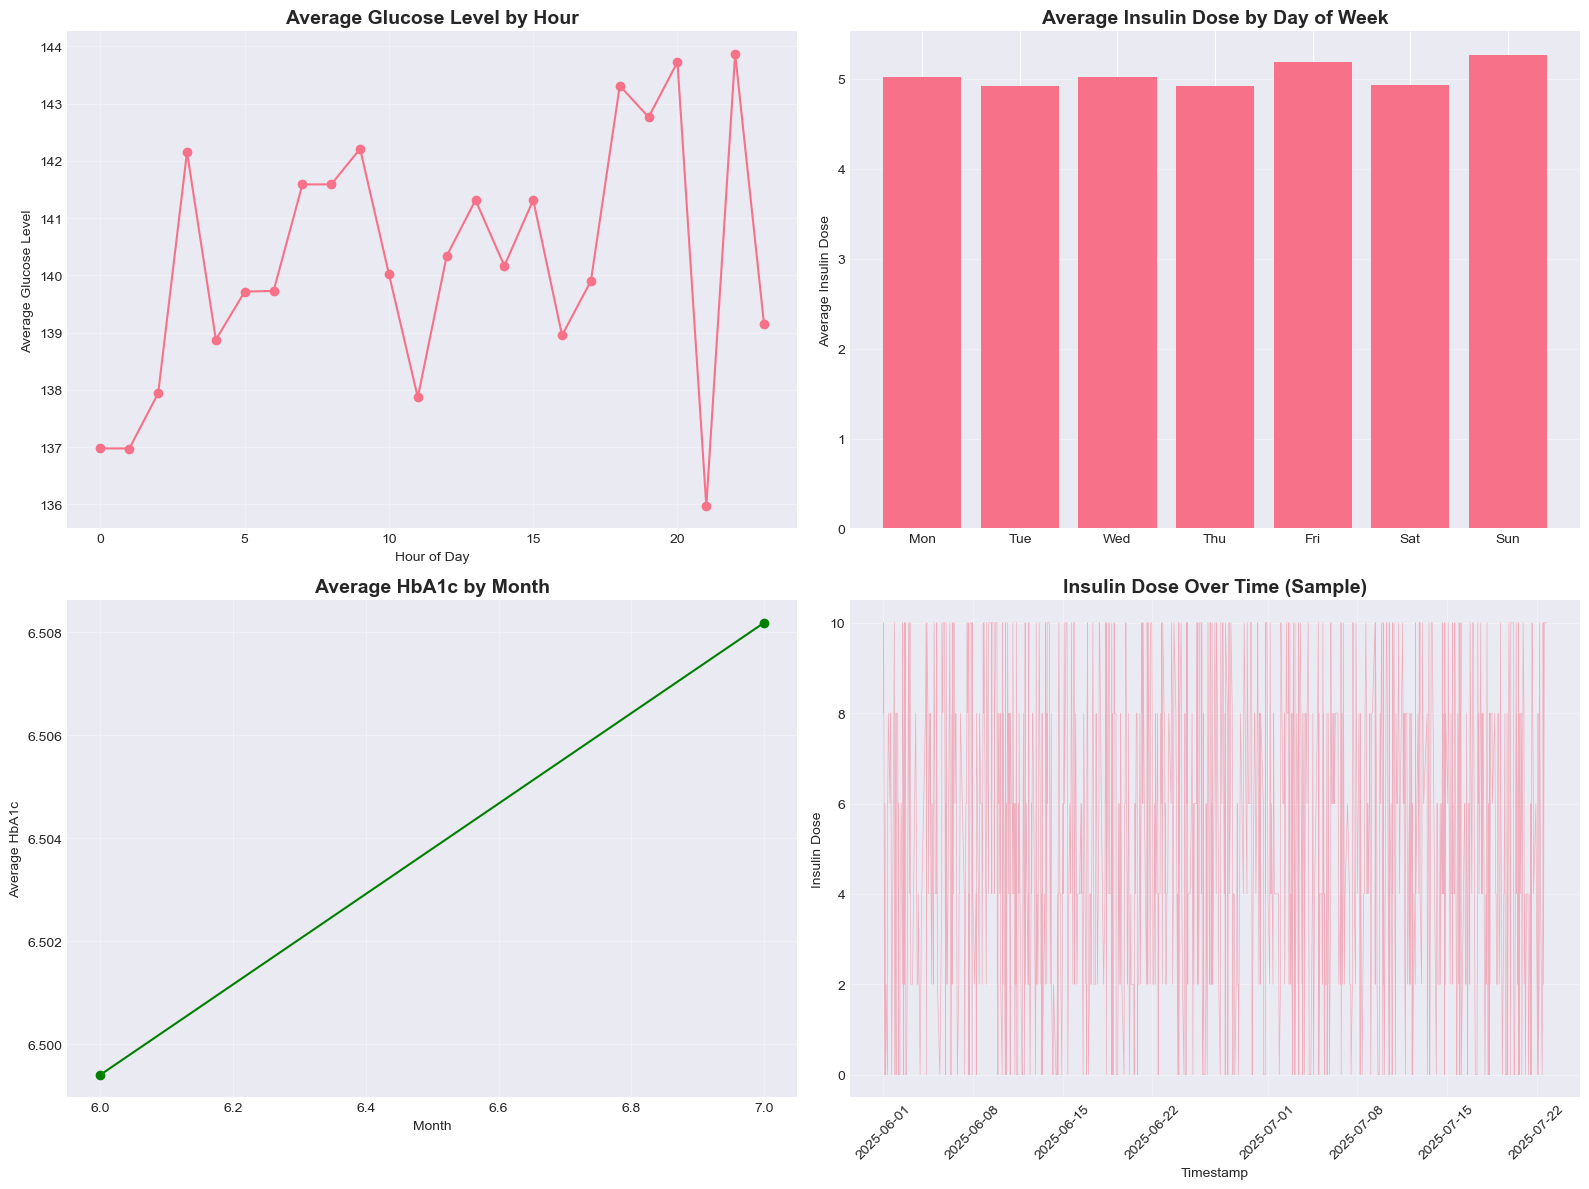

In [11]:
# Temporal patterns
if 'Timestamp' in df.columns:
    df_temp = df.copy()
    df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'], errors='coerce')
    df_temp = df_temp.dropna(subset=['Timestamp'])
    
    # Extract time features
    df_temp['Hour'] = df_temp['Timestamp'].dt.hour
    df_temp['DayOfWeek'] = df_temp['Timestamp'].dt.dayofweek
    df_temp['Month'] = df_temp['Timestamp'].dt.month
    
    # Analyze patterns
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Hourly pattern
    if 'Glucose_Level' in df_temp.columns:
        hourly_glucose = df_temp.groupby('Hour')['Glucose_Level'].mean()
        axes[0, 0].plot(hourly_glucose.index, hourly_glucose.values, marker='o')
        axes[0, 0].set_title('Average Glucose Level by Hour', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Hour of Day')
        axes[0, 0].set_ylabel('Average Glucose Level')
        axes[0, 0].grid(True, alpha=0.3)
    
    # Day of week pattern
    if 'Insulin_Dose' in df_temp.columns:
        dow_insulin = df_temp.groupby('DayOfWeek')['Insulin_Dose'].mean()
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        axes[0, 1].bar(range(len(dow_insulin)), dow_insulin.values)
        axes[0, 1].set_xticks(range(len(dow_insulin)))
        axes[0, 1].set_xticklabels([day_names[i] for i in dow_insulin.index])
        axes[0, 1].set_title('Average Insulin Dose by Day of Week', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Average Insulin Dose')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Monthly pattern
    if 'HbA1c' in df_temp.columns:
        monthly_hba1c = df_temp.groupby('Month')['HbA1c'].mean()
        axes[1, 0].plot(monthly_hba1c.index, monthly_hba1c.values, marker='o', color='green')
        axes[1, 0].set_title('Average HbA1c by Month', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Month')
        axes[1, 0].set_ylabel('Average HbA1c')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Time series of target
    if 'Insulin_Dose' in df_temp.columns:
        df_temp_sorted = df_temp.sort_values('Timestamp')
        sample_size = min(1000, len(df_temp_sorted))
        df_sample = df_temp_sorted.sample(sample_size).sort_values('Timestamp')
        axes[1, 1].plot(df_sample['Timestamp'], df_sample['Insulin_Dose'], alpha=0.5, linewidth=0.5)
        axes[1, 1].set_title('Insulin Dose Over Time (Sample)', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Timestamp')
        axes[1, 1].set_ylabel('Insulin Dose')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Timestamp column not found")


## 10. Key Insights and Summary


In [12]:
# Summary insights
print("=" * 60)
print("EDA SUMMARY & KEY INSIGHTS")
print("=" * 60)

print(f"\n1. Dataset Overview:")
print(f"   - Total records: {len(df):,}")
print(f"   - Total features: {len(df.columns)}")
print(f"   - Missing values: {df.isnull().sum().sum()}")

if 'Patient_ID' in df.columns:
    print(f"   - Unique patients: {df['Patient_ID'].nunique()}")

if target in df.columns:
    print(f"\n2. Target Variable ({target}):")
    print(f"   - Mean: {df[target].mean():.2f}")
    print(f"   - Median: {df[target].median():.2f}")
    print(f"   - Range: [{df[target].min():.2f}, {df[target].max():.2f}]")
    print(f"   - Std Dev: {df[target].std():.2f}")

print(f"\n3. Data Quality:")
print(f"   - Duplicate rows: {df.duplicated().sum()}")
print(f"   - Missing data: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")

print("\n4. Next Steps:")
print("   - Proceed to data cleaning and preprocessing")
print("   - Handle outliers and missing values")
print("   - Feature engineering")
print("   - Model development")

print("\n" + "=" * 60)


EDA SUMMARY & KEY INSIGHTS

1. Dataset Overview:
   - Total records: 4,981
   - Total features: 17
   - Missing values: 0
   - Unique patients: 100

2. Target Variable (Insulin_Dose):
   - Mean: 5.04
   - Median: 6.00
   - Range: [0.00, 10.00]
   - Std Dev: 3.41

3. Data Quality:
   - Duplicate rows: 0
   - Missing data: 0.00%

4. Next Steps:
   - Proceed to data cleaning and preprocessing
   - Handle outliers and missing values
   - Feature engineering
   - Model development

